### Imports

In [30]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt

### Free fall with nonzero initial velocity
Simulated solution

In [31]:
const_g = 9.81
const_C = .005
force_B = .1
delta = .01
ts = np.arange(0,7,delta)
depth = 20
init_h = 100
init_v = -10

h = init_h
v = init_v

trajectory = {"height":[], "velocity":[]}
for t in ts:

    if h > 20: #Air regime
        h = h - v * delta
        v = v + const_g*delta
        trajectory["height"].append(h)
        trajectory["velocity"].append(v)
    elif h > 0: #Water regime
        h = h - v * delta
        v = v + const_g*delta - force_B*delta - const_C*v**2
        trajectory["height"].append(h)
        trajectory["velocity"].append(v)
    else:
        trajectory["height"].append(0)
        trajectory["velocity"].append(0)

Analytic solution

700


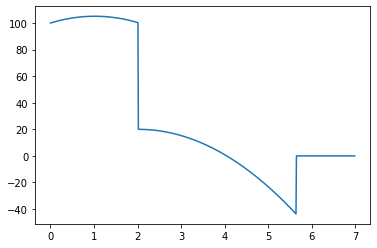

In [46]:
def calc_h(t, init_h):
    t_s = np.sqrt(2*depth/const_g)
    air_h = init_h - (const_g*t**2)/2 - init_v*t
    if t < t_s:
        return air_h #air regime
    elif air_h > 0:
        return depth - const_g*(t-t_s)**2/2 + force_B*(t-t_s)**2/2 +const_C*calc_v(t, init_h)**2*(t-t_s)**2/2
    else:
        return 0 # bottom



def calc_v(t, init_v):
    t_s = np.sqrt(2*depth/const_g)
    air_v = init_v + const_g*t
    if t <= t_s:
        return air_v
    elif air_v < np.sqrt(2*const_g*init_h):
        #calc_const = (-sqrt(const_C)*t_s*sqrt(force_B-const_g)+np.arctan((sqrt(const_C)*calc_v(t_s, init_v))/(sqrt(force_B-const_g))))/(sqrt(c)*sqrt(force_B-const_g))
        #return (sqrt(force_B-const_g)*np.tan(sqrt(const_C)*calc_const*sqrt(force_B-const_g)+sqrt(const_C)*(t-ts)*sqrt(force_B-const_G)))/(sqrt(const_C))
        calc_const = (-sqrt(const_C)*t_s*sqrt(const_g-force_B)+np.arctan((sqrt(const_C)*calc_v(t_s, init_v))/(sqrt(const_g-force_B))))/(sqrt(const_C)*sqrt(const_g-force_B))
        return (sqrt(const_g-force_B)*np.tan(sqrt(const_C)*calc_const*sqrt(const_g-force_B)+sqrt(const_C)*(t-ts)*sqrt(const_g-force_B)))/(sqrt(const_C))
    else:
        return 0

calc_trajectory = {
    "height": [calc_h(t, init_h) for t in ts],
    "velocity": [calc_v(t, init_v) for t in ts]
}
plt.plot(ts, calc_trajectory["height"], label="calc_h")
#plt.plot(ts, calc_trajectory["velocity"], label="calc_v")

Comparison

ValueError: setting an array element with a sequence.

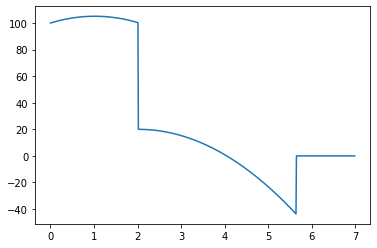

In [33]:
plt.plot(ts, calc_trajectory["height"], label="calc_h")
plt.plot(ts, calc_trajectory["velocity"], label="calc_v")
plt.scatter(ts, trajectory["height"], marker='.', label="sim_h")
plt.scatter(ts, trajectory["velocity"], marker='.', label="sim_v")
plt.plot(ts, np.full(shape=len(ts), fill_value=depth), label="water level")
plt.legend()
plt.show()

### High delta to showcase numeric artifacts:

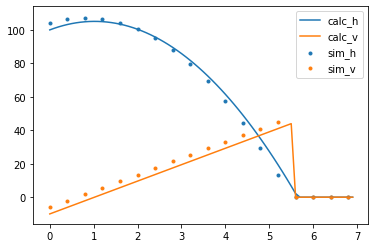

In [5]:
const_g = 9.81
high_delta = .4
hd_ts = np.arange(0,7,high_delta)
init_h = 100
init_v = -10

h = init_h
v = init_v

trajectory = {"height":[], "velocity":[]}
for t in hd_ts:
    h = h - v * high_delta
    v = v + const_g*high_delta
    if h > 0:
        trajectory["height"].append(h)
        trajectory["velocity"].append(v)
    else:
        trajectory["height"].append(0)
        trajectory["velocity"].append(0)
        
plt.plot(ts, calc_trajectory["height"], label="calc_h")
plt.plot(ts, calc_trajectory["velocity"], label="calc_v")
plt.scatter(hd_ts, trajectory["height"], marker='.', label="sim_h")
plt.scatter(hd_ts, trajectory["velocity"], marker='.', label="sim_v")

plt.legend()
plt.show()        